In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y   

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [11]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
Momentum = 0.6

In [15]:
import itertools
results = {}
for lr in itertools.product(LEARNING_RATE):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f"  %lr)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=Momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(Momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 49/50
50000/50000 [==============================] - 6s 113us/step - loss: 0.6821 - accuracy: 0.7538 - val_loss: 1.9457 - val_accuracy: 0.4699
Epoch 50/50
50000/50000 [==============================] - 6s 114us/step - loss: 0.6791 - accuracy: 0.7549 - val_loss: 1.8714 - val_accuracy: 0.4999
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_____________________________________________________________

Epoch 47/50
50000/50000 [==============================] - 5s 108us/step - loss: 0.9882 - accuracy: 0.6511 - val_loss: 1.3663 - val_accuracy: 0.5216
Epoch 48/50
50000/50000 [==============================] - 6s 110us/step - loss: 0.9785 - accuracy: 0.6573 - val_loss: 1.4114 - val_accuracy: 0.5142
Epoch 49/50
50000/50000 [==============================] - 5s 110us/step - loss: 0.9660 - accuracy: 0.6599 - val_loss: 1.5478 - val_accuracy: 0.4792
Epoch 50/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.9692 - accuracy: 0.6596 - val_loss: 1.4304 - val_accuracy: 0.5130
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________

Epoch 45/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.5407 - accuracy: 0.4598 - val_loss: 1.5686 - val_accuracy: 0.4528
Epoch 46/50
50000/50000 [==============================] - 6s 118us/step - loss: 1.5361 - accuracy: 0.4626 - val_loss: 1.5685 - val_accuracy: 0.4498
Epoch 47/50
50000/50000 [==============================] - 6s 126us/step - loss: 1.5309 - accuracy: 0.4650 - val_loss: 1.5499 - val_accuracy: 0.4551
Epoch 48/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.5264 - accuracy: 0.4664 - val_loss: 1.5517 - val_accuracy: 0.4505
Epoch 49/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.5221 - accuracy: 0.4683 - val_loss: 1.5470 - val_accuracy: 0.4527
Epoch 50/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5177 - accuracy: 0.4681 - val_loss: 1.5399 - val_accuracy: 0.4612
Experiment with LR = 0.000100
Model: "model_1"
___________________________________________________________

Epoch 43/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.9114 - accuracy: 0.3331 - val_loss: 1.9146 - val_accuracy: 0.3340
Epoch 44/50
50000/50000 [==============================] - 6s 120us/step - loss: 1.9080 - accuracy: 0.3344 - val_loss: 1.9112 - val_accuracy: 0.3346
Epoch 45/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.9046 - accuracy: 0.3353 - val_loss: 1.9079 - val_accuracy: 0.3338
Epoch 46/50
50000/50000 [==============================] - 6s 121us/step - loss: 1.9014 - accuracy: 0.3357 - val_loss: 1.9047 - val_accuracy: 0.3370
Epoch 47/50
50000/50000 [==============================] - 6s 123us/step - loss: 1.8981 - accuracy: 0.3373 - val_loss: 1.9017 - val_accuracy: 0.3358
Epoch 48/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.8951 - accuracy: 0.3389 - val_loss: 1.8988 - val_accuracy: 0.3383
Epoch 49/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.8921 - accuracy: 0.3393

50000/50000 [==============================] - 6s 110us/step - loss: 2.2313 - accuracy: 0.1969 - val_loss: 2.2320 - val_accuracy: 0.1956
Epoch 41/50
50000/50000 [==============================] - 5s 110us/step - loss: 2.2294 - accuracy: 0.1983 - val_loss: 2.2301 - val_accuracy: 0.1970
Epoch 42/50
50000/50000 [==============================] - 6s 113us/step - loss: 2.2275 - accuracy: 0.1988 - val_loss: 2.2282 - val_accuracy: 0.1980
Epoch 43/50
50000/50000 [==============================] - 6s 129us/step - loss: 2.2256 - accuracy: 0.1999 - val_loss: 2.2264 - val_accuracy: 0.2003
Epoch 44/50
50000/50000 [==============================] - 6s 121us/step - loss: 2.2238 - accuracy: 0.2006 - val_loss: 2.2245 - val_accuracy: 0.2012
Epoch 45/50
50000/50000 [==============================] - 6s 127us/step - loss: 2.2219 - accuracy: 0.2014 - val_loss: 2.2227 - val_accuracy: 0.2023
Epoch 46/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.2201 - accuracy: 0.2024 - val_loss:

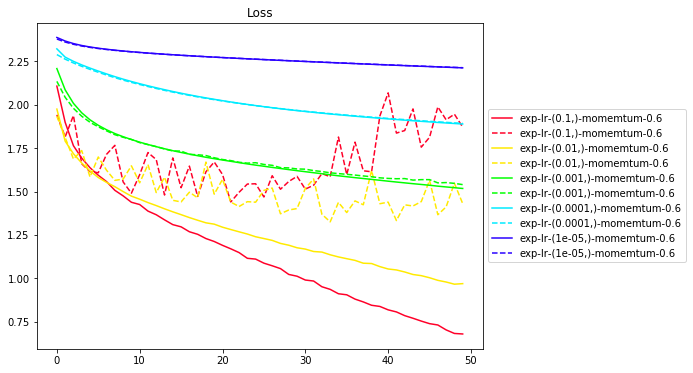

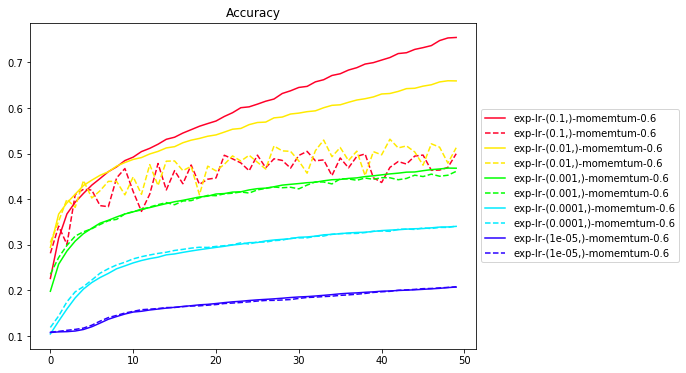

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [19]:
import itertools
results = {}
for lr in itertools.product(LEARNING_RATE):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f"  %lr)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(Momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-accuracy': train_acc,
                             'valid-accuracy': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 7s 130us/step - loss: 2.3066 - accuracy: 0.1020 - val_loss: 2.3072 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.3072 - accuracy: 0.1012 - val_loss: 2.3067 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 7s 130us/step - loss: 2.3070 - accuracy: 0.1010 - val_loss: 2.3047 - val_accuracy: 0.1000
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________________

Epoch 46/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.5382 - accuracy: 0.4483 - val_loss: 1.5929 - val_accuracy: 0.4327
Epoch 47/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5291 - accuracy: 0.4504 - val_loss: 1.6022 - val_accuracy: 0.4262
Epoch 48/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5253 - accuracy: 0.4524 - val_loss: 1.6224 - val_accuracy: 0.4237
Epoch 49/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5420 - accuracy: 0.4445 - val_loss: 1.6163 - val_accuracy: 0.4187
Epoch 50/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.5303 - accuracy: 0.4489 - val_loss: 1.5838 - val_accuracy: 0.4380
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
__________

Epoch 44/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.7044 - accuracy: 0.7486 - val_loss: 1.6700 - val_accuracy: 0.5139
Epoch 45/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.6893 - accuracy: 0.7537 - val_loss: 1.7122 - val_accuracy: 0.5134
Epoch 46/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.6740 - accuracy: 0.7587 - val_loss: 1.7330 - val_accuracy: 0.5176
Epoch 47/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.6735 - accuracy: 0.7595 - val_loss: 1.7571 - val_accuracy: 0.5255
Epoch 48/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.6447 - accuracy: 0.7688 - val_loss: 1.7545 - val_accuracy: 0.5203
Epoch 49/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.6376 - accuracy: 0.7711 - val_loss: 1.8285 - val_accuracy: 0.5139
Epoch 50/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.6324 - accuracy: 0.7739

Epoch 42/50
50000/50000 [==============================] - 7s 137us/step - loss: 0.8916 - accuracy: 0.6925 - val_loss: 1.3704 - val_accuracy: 0.5317
Epoch 43/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.8815 - accuracy: 0.6928 - val_loss: 1.3473 - val_accuracy: 0.5400
Epoch 44/50
50000/50000 [==============================] - 7s 138us/step - loss: 0.8632 - accuracy: 0.7024 - val_loss: 1.3470 - val_accuracy: 0.5428
Epoch 45/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.8583 - accuracy: 0.7046 - val_loss: 1.3686 - val_accuracy: 0.5320
Epoch 46/50
50000/50000 [==============================] - 7s 139us/step - loss: 0.8433 - accuracy: 0.7079 - val_loss: 1.3372 - val_accuracy: 0.5487
Epoch 47/50
50000/50000 [==============================] - 7s 142us/step - loss: 0.8338 - accuracy: 0.7149 - val_loss: 1.4111 - val_accuracy: 0.5273
Epoch 48/50
50000/50000 [==============================] - 7s 140us/step - loss: 0.8341 - accuracy: 0.7116

Epoch 40/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4204 - accuracy: 0.5065 - val_loss: 1.4743 - val_accuracy: 0.4783
Epoch 41/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.4154 - accuracy: 0.5083 - val_loss: 1.4728 - val_accuracy: 0.4768
Epoch 42/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.4108 - accuracy: 0.5103 - val_loss: 1.4630 - val_accuracy: 0.4850
Epoch 43/50
50000/50000 [==============================] - 7s 140us/step - loss: 1.4044 - accuracy: 0.5131 - val_loss: 1.4614 - val_accuracy: 0.4875
Epoch 44/50
50000/50000 [==============================] - 7s 139us/step - loss: 1.3986 - accuracy: 0.5140 - val_loss: 1.4623 - val_accuracy: 0.4852
Epoch 45/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.3941 - accuracy: 0.5160 - val_loss: 1.4557 - val_accuracy: 0.4882
Epoch 46/50
50000/50000 [==============================] - 7s 141us/step - loss: 1.3893 - accuracy: 0.5182

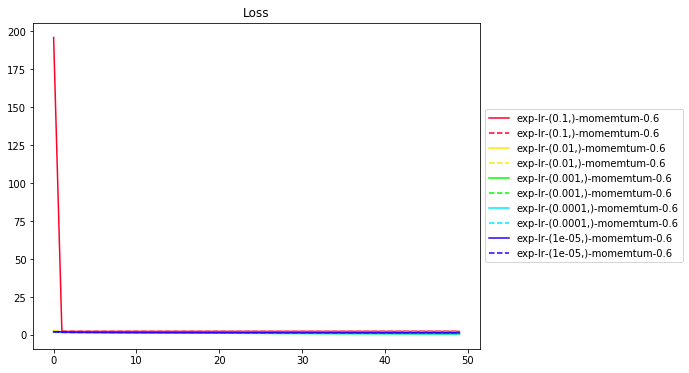

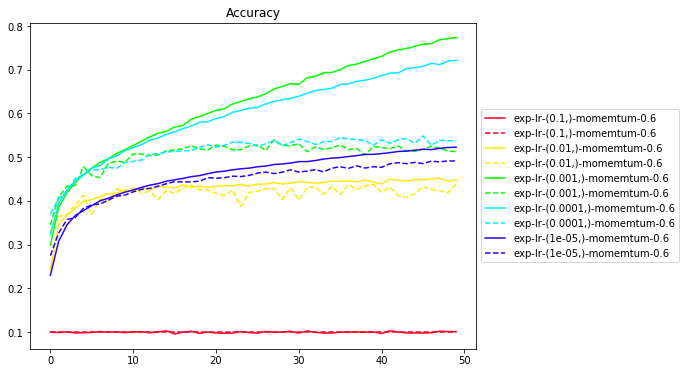

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-accuracy'])),results[cond]['train-accuracy'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-accuracy'])),results[cond]['valid-accuracy'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()